In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

Growth and rate of return

Growth and Rate of Return are two concepts that are ubiquitous throughout the financial world. Recall that the cumulative returns from investing $100 in an asset that grows at 5% per year, over a 2 year period can be calculated as:

100 * (1+0.05)^2

In [2]:
# Calculate the future value (cumulative return) of a $100 investment which grows at a rate of 6% per year for 30 years in a row and assign it to future_value.
future_value = 100 * (1+0.06)**30
print("Future Value of Investment: " + str(round(future_value, 2)))

Future Value of Investment: 574.35


Compound interest

As you saw in the previous exercise, both time and the rate of return are very important variables when forecasting the future value of an investment.

Another important variable is the number of compounding periods, which can greatly affect compounded returns over time.

𝐴=𝑃*(1+𝑟/𝑛)^𝑛𝑡

A: The future value of the investment/loan, including interest.

P: The principal investment amount (initial deposit or loan amount).

r: The annual interest rate (decimal).

n: The number of times interest is compounded per year.

t: The number of years the money is invested or borrowed for.

In [3]:
# Calculate the value of a $100 investment which grows at a rate of 6% per year for 30 years in a row
# Predefined variables
initial_investment = 100
growth_periods = 30
growth_rate = 0.06

# Calculate the value for the investment compounded once per year
compound_periods_1 = 1
investment_1 = initial_investment*(1 + growth_rate / compound_periods_1)**(compound_periods_1*growth_periods)
print("Investment 1: " + str(round(investment_1, 2)))

# Calculate the value for the investment compounded quarterly
compound_periods_2 = 4
investment_2 = initial_investment*(1 + growth_rate / compound_periods_2)**(compound_periods_2*growth_periods)
print("Investment 2: " + str(round(investment_2, 2)))

# Calculate the value for the investment compounded monthly
compound_periods_3 = 12
investment_3 = initial_investment*(1 + growth_rate / compound_periods_3)**(compound_periods_3*growth_periods)
print("Investment 3: " + str(round(investment_3, 2)))

Investment 1: 574.35
Investment 2: 596.93
Investment 3: 602.26


Discount factors and depreciation

Unfortunately, not everything grows in value over time.

In fact, many assets depreciate, or lose value over time. To simulate this, you can simply assume a negative expected rate of return.

Example:

Calculate the final depreciated value of an initially $10,000 car which declines in value by 3% per year for 10 years:

10000*(1-0.03)^10

In [4]:
# Calculate the future value of a $100 investment that depreciates in value by 5% per year for 10 years and assign it to future_value.

# Calculate the future value
initial_investment = 100
growth_rate = -0.05
growth_periods = 10
future_value = initial_investment*(1 + growth_rate)**(growth_periods)
print("Future value: " + str(round(future_value, 2)))

# Calculate the discount factor
discount_factor = 1/((1 + growth_rate)**(growth_periods))
print("Discount factor: " + str(round(discount_factor, 2)))

# Derive the initial value of the investment
initial_investment_again = future_value*discount_factor
print("Initial value: " + str(round(initial_investment_again, 2)))

Future value: 59.87
Discount factor: 1.67
Initial value: 100.0


Present value (amount to invest today to reach a future sum of e.g. $10,000 in 15 years with an interest rate of 3%.)

Luckily for you, there is a module called numpy which contains many functions which will make your life much easier when working with financial values.

The .pv(rate, nper, pmt, fv) function, for example, allows you to calculate the present value of an investment as before with a few simple parameters:

rate: The rate of return of the investment

nper: The lifespan of the investment

pmt: The (fixed) payment at the beginning or end of each period (which is 0 in our example)

fv: The future value of the investment

You can use this formula in many ways. For example, you can calculate the present value of future investments in today's dollars.

In [5]:
# Calculate investment_1
# compute the present value of an investment which will yield $10,000 15 years from now at an inflation rate of 3% per year and assign it to investment_1.
investment_1 = npf.pv(rate=0.03, nper=15, pmt=0, fv=10000)

# Note that the present value returned is negative, so we multiply the result by -1
print("Investment 1 is worth " + str(round(-investment_1, 2)) + " in today's dollars")

# Calculate investment_2
# Compute the present value of the same investment, but with a time horizon of only 10 years and an inflation rate of 5%, assigning it to investment_2.
investment_2 = npf.pv(rate=0.05, nper=10, pmt=0, fv=10000)
print("Investment 2 is worth " + str(round(-investment_2, 2)) + " in today's dollars")

Investment 1 is worth 6418.62 in today's dollars
Investment 2 is worth 6139.13 in today's dollars


Future value

The numpy module also contains a similar function, .fv(rate, nper, pmt, pv), which allows you to calculate the future value of an investment as before with a few simple parameters:

rate: The rate of return of the investment

nper: The lifespan of the investment

pmt: The (fixed) payment at the beginning or end of each period (which is 0 in our example)

pv: The present value of the investment

It is important to note that in this function call, you must pass a negative value into the pv parameter if it represents a negative cash flow (cash going out). In other words, if you were to compute the future value of an investment, requiring an up-front cash payment, you would need to pass a negative value to the pv parameter in the .fv() function.

In [6]:
# Calculate investment_1
investment_1 = npf.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 15 years")

# Calculate investment_2
investment_2 = npf.fv(rate=0.08, nper=15, pmt=0, pv=-10000)
print("Investment 2 will yield a total of $" + str(round(investment_2, 2)) + " in 15 years")

Investment 1 will yield a total of $20789.28 in 15 years
Investment 2 will yield a total of $31721.69 in 15 years


Adjusting future values for inflation
                       
You can now put together what you learned in the previous exercises by following a simple methodology:

First, forecast the future value of an investment given a rate of return

Second, discount the future value of the investment by a projected inflation rate

The methodology above will use both the .fv() and .pv() functions to arrive at the projected value of a given investment in today's dollars, adjusted for inflation.

In [7]:
# Calculate investment_1
investment_1 = npf.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 10 years")

# Calculate investment_2
investment_1_discounted = npf.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)
print("After adjusting for inflation, investment 1 is worth $" + str(round(-investment_1_discounted, 2)) + " in today's dollars")

Investment 1 will yield a total of $21589.25 in 10 years
After adjusting for inflation, investment 1 is worth $16064.43 in today's dollars


Discounting cash flows

You can use numpy's net present value function numpy.npv(rate, values) to calculate the net present value of a series of cash flows. You can create these cash flows by using a numpy.array([...]) of values.

Compute the NPV of the same cash flows from the following project, but assuming different discount rates:

In [8]:
# Predefined array of cash flows
cash_flows = np.array([100, 100, 100, 100, 100])

# Calculate investment_1
investment_1 = npf.npv(rate=0.03, values=cash_flows)
print("Investment 1's net present value is $" + str(round(investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = npf.npv(rate=0.05, values=cash_flows)
print("Investment 2's net present value is $" + str(round(investment_2, 2)) + " in today's dollars")

# Calculate investment_3
investment_3 = npf.npv(rate=0.07, values=cash_flows)
print("Investment 3's net present value is $" + str(round(investment_3, 2)) + " in today's dollars")

Investment 1's net present value is $471.71 in today's dollars
Investment 2's net present value is $454.6 in today's dollars
Investment 3's net present value is $438.72 in today's dollars


Initial project costs

The numpy.npv(rate, values) function is very powerful because it allows you to pass in both positive and negative values.

For this exercise, you will calculate the net present value of two potential projects with different cash flows:

Year	Project 1	Project 2
    
1	-250 (initial investment)	-250 (initial investment)
    
2	100 cash flow	300 cash flow
    
3	200 cash flow	-250 (net investment)
    
4	300 cash flow	300 cash flow
    
5	400 cash flow	300 cash flow
    
In this example, project 1 only requires an initial investment of 250, generating a slowly increasing series of cash flows over the next 4 years.

Project 2, on the other hand, requires an initial investment of 250 and an additional investment of 250 in year 3. However, project 2 continues to generate larger cash flows.

Assuming both projects don't generate any more cash flows after the fifth year, which project would you decide to undertake? The best way to decide is by comparing the NPV of both projects.

In [9]:
# Create an array of cash flows for project 1
cash_flows_1 = np.array([-250,100,200,300,400])

# Create an array of cash flows for project 2
cash_flows_2 = np.array([-250,300,-250,300,300])

# Calculate the net present value of project 1
investment_1 = npf.npv(rate=0.03, values=cash_flows_1)
print("The net present value of Investment 1 is worth $" + str(round(investment_1, 2)) + " in today's dollars")

# Calculate the net present value of project 2
investment_2 = npf.npv(rate=0.03, values=cash_flows_2)
print("The net present value of Investment 2 is worth $" + str(round(investment_2, 2)) + " in today's dollars")

The net present value of Investment 1 is worth $665.54 in today's dollars
The net present value of Investment 2 is worth $346.7 in today's dollars


Diminishing cash flows

Remember how compounded returns grow rapidly over time? Well, it works in the reverse, too. Compounded discount factors over time will quickly shrink a number towards zero.

For example, 100 at a 3% annual discount for 1 year is still worth roughly 97.08:

But this number shrinks quite rapidly as the number of discounting periods increases:

This means that the longer in the future your cash flows will be received (or paid), the close to 0 that number will be.

In [10]:
# Calculate the present value of a single $100 payment received 30 years from now with an annual inflation rate of 3%, and assign it to investment_1.
# Calculate the present value of the same payment, but if it was received 50 and 100 years from now, and assign it to investment_2 and investment_3 respectively.

# Calculate investment_1
investment_1 = npf.pv(rate=0.03, nper=30, pmt=0, fv=100)
print("Investment 1 is worth $" + str(round(-investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = npf.pv(rate=0.03, nper=50, pmt=0, fv=100)
print("Investment 2 is worth $" + str(round(-investment_2, 2)) + " in today's dollars")

# Calculate investment_3
investment_3 = npf.pv(rate=0.03, nper=100, pmt=0, fv=100)
print("Investment 3 is worth $" + str(round(-investment_3, 2)) + " in today's dollars")

Investment 1 is worth $41.2 in today's dollars
Investment 2 is worth $22.81 in today's dollars
Investment 3 is worth $5.2 in today's dollars


Project proposals and cash flows projections

Your project managers have projected the cash flows for each of the proposals.

Project 1 provides higher short term cash flows, but Project 2 becomes more profitable over time.

The cash flow projections for both projects are as follows:

Year	Project 1	Project 2

1	-1,000 (initial investment)	-1,000 (initial investment)

2	200 (cash flow)	150 (cash flow)

3	250	225

4	300	300

5	350	375

6	400	425

7	450	500

8	500	575

9	550	600

10	600	625

Note: The projections are provided in thousands. For example, 1,000 = 1,000,000. We will use the smaller denominations to make everything easier to read. This is also commonly done in financial statements with thousands or even millions in order to represent millions or billions.

In [11]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-1000,200,250,300,350,400,450,500,550,600])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-1000,150,225,300,375,425,500,575,600,625])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000

Internal Rate of Return

Now that you have the cash flow projections ready to go for each project, you want to compare the internal rate of return (IRR) of each project to help you decide which project would be most beneficial for your company in terms of yield (rate of return). In this exercise, you will calculate the internal rate of return for each project using np.irr(values).

In [12]:
# Calculate the internal rate of return for Project 1
irr_project1 = npf.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the internal rate of return for Project 2
irr_project2 = npf.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

Project 1 IRR: 28.92%
Project 2 IRR: 28.78%


Debt and equity financing

In the previous chapter, you were able to assume that your discount rate for the NPV calculation was solely based on a measure such as inflation.

However, in this chapter, you are the CEO of a new company that has outstanding debt and financing costs, which you will have to adjust for.

You will use the WACC as your discount rate in upcoming exercises.

For this exercise, assume you take out a 1,000,000 loan to finance the project, which will be your company's only outstanding debt. This loan will represent 50% of your company's total financing of 2,000,000. The remaining funding comes from the market value of equity.

In [13]:
# Set the market value of debt
mval_debt = 1000000

# Set the market value of equity
mval_equity = 1000000

# Compute the total market value of your company's financing
mval_total = mval_debt + mval_equity

# Compute the proportion of your company's financing via debt
percent_debt = 0.5
print("Debt Financing: " + str(round(100*percent_debt, 2)) + "%")

# Compute the proportion of your company's financing via equity
percent_equity = 0.5
print("Equity Financing: " + str(round(100*percent_equity, 2)) + "%")

Debt Financing: 50.0%
Equity Financing: 50.0%


Calculating WACC

In addition to determining the proportion of both equity and debt financing, you will need to estimate the cost of financing via both debt and equity in order to estimate your WACC.

The cost of debt financing can be estimated as the amount you will have to pay on a new loan. This can be estimated by looking at the interest rates of loans of similar sizes to similar companies, or could be based on previous loans your company may already have been issued.

The cost of equity financing can be estimated as the return on equity of similar companies. Calculating the return on equity is a simple accounting exercise, but all you need to know is that essentially, investors will require a rate of return that is close to what could be earned by a similar investment.

In [14]:
# The proportion of debt vs equity financing is predefined
percent_debt = 0.50
percent_equity = 0.50

# Set the cost of equity
cost_equity = 0.18

# Set the cost of debt
cost_debt = 0.12

# Set the corporate tax rate
tax_rate = 0.35

# Calculate the WACC
wacc = (percent_equity*cost_equity) + (percent_debt*cost_debt)*(1-tax_rate)
print("WACC: " + str(round(100*wacc, 2)) + "%")

WACC: 12.9%


Comparing project NPV with IRR

Companies use their WACC as the discount rate when calculating the net present value of potential projects.

In the same way that you discounted values by inflation in the previous chapter to account for costs over time, companies adjust the cash flows of potential projects by their cost of financing (the WACC) to account for their investor's required rate of return based on market conditions.

Now that you calculated the WACC, you can determine the net present value (NPV) of each project's cash flows. 

In [15]:
# Calculate the net present value for Project 1
npv_project1 = npf.npv(wacc, cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the net present value for Project 2
npv_project2 = npf.npv(wacc, cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 NPV: 856073.18
Project 2 NPV: 904741.35


Two project with different lifespans

The board of the company has decided to go a different direction, involving slightly shorter term projects and lower initial investments.

Your project managers have come up with two new ideas, and projected the cash flows for each of the proposals.

Project 1 has a lifespan of 8 years, but Project 2 only has a lifespan of 7 years. Project 1 requires an initial investment of 700,000, but Project 2 only requires 400,000.

The cash flow projections for both projects are as follows:

Year	Project 1	Project 2

1	-700 (initial investment)	-400 (initial investment)

2	100 (cash flow)	50 (cash flow)

3	150	100

4	200	150

5	250	200

6	300	250

7	350	300

8	400	N / A

In [16]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-700,100,150,200,250,300,350,400])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-400,50,100,150,200,250,300])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000

Calculating IRR and NPV with different project lifespans

Now that you calculated the WACC, you can calculate and compare the IRRs and NPVs of each project.

While the IRR remains relatively comparable across projects, the NPV, on the other hand, will be much more difficult to compare given the additional year required for project 1.

Luckily, in the next exercise, we will introduce another method to compare the NPVs of the projects, but we will first need to compute the NPVs as before.

In [17]:
# Calculate the IRR for Project 1
irr_project1 = npf.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the IRR for Project 2
irr_project2 = npf.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

# Set the wacc equal to 12.9%
wacc = 0.129

# Calculate the NPV for Project 1
npv_project1 = npf.npv(wacc, cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the NPV for Project 2
npv_project2 = npf.npv(wacc, cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 IRR: 22.94%
Project 2 IRR: 26.89%
Project 1 NPV: 302744.98
Project 2 NPV: 231228.39


Using the equivalent annual annuity approach

Since the net present values of each project are not directly comparable given the different lifespans of each project, you will have to consider a different approach.

The equivalent annual annuity (EAA) approach allows us to compare two projects by essentially assuming that each project is an investment generating a flat interest rate each year (an annuity), and calculating the annual payment you would receive from each project, discounted to present value.

You can compute the EAA of each project using the .pmt(rate, nper, pv, fv) function in numpy.

In [18]:
# Calculate the EAA for Project 1
eaa_project1 = npf.pmt(rate=wacc, nper=8, pv=-1*npv_project1, fv=0)
print("Project 1 EAA: " + str(round(eaa_project1, 2)))

# Calculate the EAA for Project 2
eaa_project2 = npf.pmt(rate=wacc, nper=7, pv=-1*npv_project2, fv=0)
print("Project 2 EAA: " + str(round(eaa_project2, 2)))

Project 1 EAA: 62872.2
Project 2 EAA: 52120.61


Taking out a mortgage loan

You're expecting a child soon, and its time to start looking for a home.

You're currently living out of an apartment in New York City, but your blossoming career as a Data Scientist has allowed you to save up a sizable sum and purchase a home in neighboring Hoboken, New Jersey.

You have decided to purchase a beautiful brownstone home in the $800,000 range. While you do have a considerable amount of cash on hand, you don't have enough to purchase the entire home outright, which means you will have to take the remaining balance out as a mortgage loan. From the sound of it, you'll have to put about 20% down up-front to a mortgage loan of that size.

This up-front payment is known as a down payment.

In [19]:
# Set the value of the home you are looking to buy
home_value = 800000

# What percentage are you paying up-front?
down_payment_percent = 0.2

# Calculate the dollar value of the down payment
down_payment = 160000
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = 640000
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 160000
Mortgage Loan: 640000


Calculating the monthly mortgage payment

In order to make sure you can afford the home, you will have to calculate the monthly mortgage payment you will have to make on a loan that size.

Now, since you will be paying a monthly mortgage, you will have to convert each of the parameters into their monthly equivalents. Be careful when adjusting the interest rate, which is compounding!

In order to calculate the monthly mortgage payment, you will use the numpy function .pmt(rate, nper, pv) where:

rate = The periodic (monthly) interest rate
nper = The number of payment periods (months) in the lifespan of the mortgage loan
pv = The total value of the mortgage loan
You have been given a 30-year mortgage loan quote for your desired amount at 3.75%. The value of the mortgage loan is available as mortgage_loan.

The annual mortgage rate is available as mortgage_rate

In [20]:
mortgage_rate = 0.0375

In [21]:
# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = (1 + mortgage_rate)**(1/12) - 1

mortgage_rate_periodic

0.003072541703255549

In [22]:
# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = 12*30

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*npf.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 2941.13


Calculating interest and principal payments

Due to the size of the mortgage loan, you begin the mortgage in the initial period by paying mostly interest and retaining very little principal, or equity that goes towards the ownership of your home.

This means that if you were to stop paying your mortgage and sell your home after only a few years, the bank would actually own most of the home because what you paid was mostly interest, and very little principal.

In [23]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan * mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


Simulating periodic payments (I)

You have all the tools you'll need to simulate the mortgage payments over time.

Every time a mortgage payment is made, the following payment will have a slightly lower percentage, which is used to pay off interest. This means that more of the remainder will go towards the portion of the home that you own instead of the bank. This is important to determine how much you will gain from selling the home before paying off your mortgage, or to determine when your mortgage is underwater. 

You will now write a simple program to calculate the interest and mortgage portions of each payment over time.

The principal_remaining variable is initialized as an array of 0's with length equal to the number of payment periods.

In [24]:
principal_remaining = np.array([0]*mortgage_payment_periods)
interest_paid = np.array([0]*mortgage_payment_periods)
principal_paid = np.array([0]*mortgage_payment_periods)
principal_remaining

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

0 previous_principal_remaining: 640000 interest_payment: 1966.43 principal_payment: 974.7 sum(=periodic_mortgage_payment): 2941.13
1 previous_principal_remaining: 639025 interest_payment: 1963.43 principal_payment: 977.7 sum(=periodic_mortgage_payment): 2941.13
2 previous_principal_remaining: 638047 interest_payment: 1960.43 principal_payment: 980.7 sum(=periodic_mortgage_payment): 2941.13
3 previous_principal_remaining: 637066 interest_payment: 1957.41 principal_payment: 983.72 sum(=periodic_mortgage_payment): 2941.13
4 previous_principal_remaining: 636082 interest_payment: 1954.39 principal_payment: 986.74 sum(=periodic_mortgage_payment): 2941.13
5 previous_principal_remaining: 635095 interest_payment: 1951.36 principal_payment: 989.77 sum(=periodic_mortgage_payment): 2941.13
6 previous_principal_remaining: 634105 interest_payment: 1948.31 principal_payment: 992.82 sum(=periodic_mortgage_payment): 2941.13
7 previous_principal_remaining: 633112 interest_payment: 1945.26 principal_paym

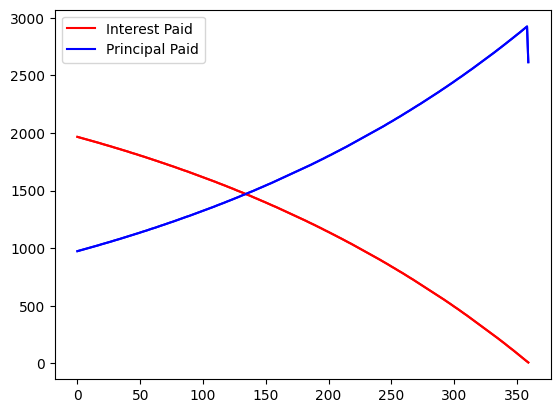

In [25]:
# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment-interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment

    # Print the payments for the first few periods
    if i < 10 or i > mortgage_payment_periods - 10:
        print(i, 'previous_principal_remaining:',previous_principal_remaining, 'interest_payment:',interest_payment, 'principal_payment:',principal_payment,
             'sum(=periodic_mortgage_payment):',interest_payment+principal_payment)
    
# Plot the interest vs principal
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
interest_plot, = plt.plot(interest_paid, color="red", label="Interest Paid") 
principal_plot, = plt.plot(principal_paid, color="blue", label="Principal Paid")
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.show()

Cumulative payments and home equity

You are faithfully paying your mortgage each month, but it's difficult to tell how much of the house you actually own and how much interest you have paid in total over the years.

Use np.cumsum() to add up all the interest payments and also to add up all the principal payments over time to see how your ownership changes over time.

Recall that np.cumsum() performs a cumulative sum over time. Return a series of iterative sums instead of just a single number.

principal_paid, interest_paid, 

[0.2012175  0.20243875 0.20366375 0.2048925  0.206125   0.20736125
 0.20860125 0.209845   0.2110925  0.212345   0.21360125 0.21486125
 0.216125   0.2173925  0.21866375 0.21993875 0.2212175  0.2225
 0.2237875  0.22507875 0.22637375 0.2276725  0.228975   0.23028125
 0.2315925  0.2329075  0.23422625 0.23554875 0.23687625 0.2382075
 0.2395425  0.24088125 0.242225   0.2435725  0.24492375 0.24628
 0.24764    0.24900375 0.2503725  0.251745   0.2531225  0.25450375
 0.25588875 0.25727875 0.2586725  0.26007125 0.26147375 0.26288
 0.26429125 0.26570625 0.26712625 0.26855    0.26997875 0.27141125
 0.27284875 0.27429    0.27573625 0.2771875  0.2786425  0.2801025
 0.28156625 0.283035   0.2845075  0.285985   0.2874675  0.28895375
 0.290445   0.29194125 0.29344125 0.29494625 0.29645625 0.29797125
 0.29949    0.30101375 0.3025425  0.304075   0.3056125  0.307155
 0.3087025  0.310255   0.31181125 0.3133725  0.31493875 0.31651
 0.31808625 0.3196675  0.32125375 0.322845   0.32444    0.32604
 0.327645   0.3

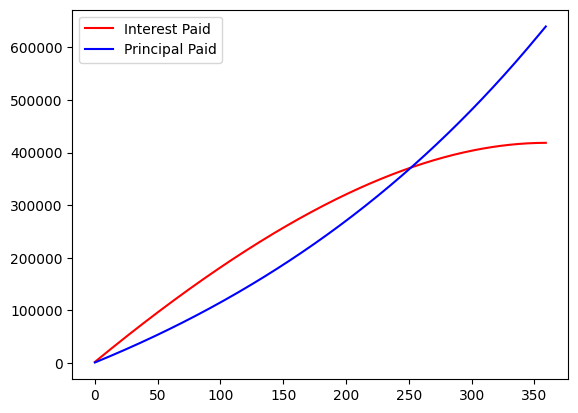

In [26]:
# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)
print(cumulative_percent_owned)

# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_home_equity, color='blue')
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.show()

Rising housing 

Home values have been rising steadily each year, and this is a rather large investment for you.

Calculate your home equity value over time given a steady growth rate of 0.25% per month. A repeated array of this growth rate (with a length equal to the number of mortgage payment periods) is already stored for you in an object called growth_array.

In [27]:
growth_array = np.array([0.0025]*mortgage_payment_periods)
growth_array

array([0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
      

In [28]:
# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1 + growth_array)

cumulative_growth_forecast

array([1.0025    , 1.00500625, 1.00751877, 1.01003756, 1.01256266,
       1.01509406, 1.0176318 , 1.02017588, 1.02272632, 1.02528313,
       1.02784634, 1.03041596, 1.032992  , 1.03557448, 1.03816341,
       1.04075882, 1.04336072, 1.04596912, 1.04858404, 1.0512055 ,
       1.05383352, 1.0564681 , 1.05910927, 1.06175704, 1.06441144,
       1.06707247, 1.06974015, 1.0724145 , 1.07509553, 1.07778327,
       1.08047773, 1.08317892, 1.08588687, 1.08860159, 1.09132309,
       1.0940514 , 1.09678653, 1.0995285 , 1.10227732, 1.10503301,
       1.10779559, 1.11056508, 1.11334149, 1.11612485, 1.11891516,
       1.12171245, 1.12451673, 1.12732802, 1.13014634, 1.13297171,
       1.13580414, 1.13864365, 1.14149026, 1.14434398, 1.14720484,
       1.15007285, 1.15294804, 1.15583041, 1.15871998, 1.16161678,
       1.16452082, 1.16743213, 1.17035071, 1.17327658, 1.17620977,
       1.1791503 , 1.18209817, 1.18505342, 1.18801605, 1.19098609,
       1.19396356, 1.19694847, 1.19994084, 1.20294069, 1.20594

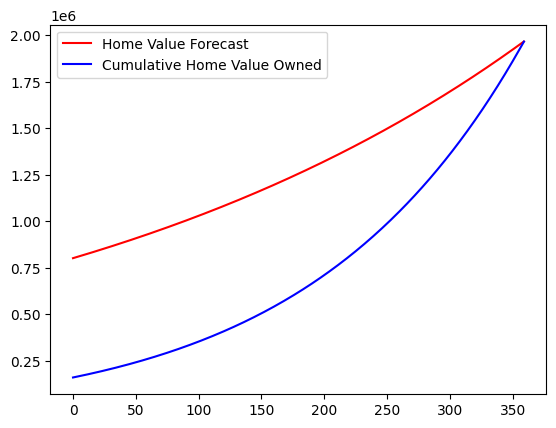

In [29]:
# Forecast the home value over time
home_value_forecast = home_value*cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = cumulative_percent_owned*home_value_forecast


# Plotting the cumulative home value forecasted and owned
homevalue_plot, = plt.plot(home_value_forecast, color='red', label='Home Value Forecast')
homeequity_plot, = plt.plot(cumulative_home_value_owned, color='blue', label='Cumulative Home Value Owned')

# Add legend
plt.legend(handles=[homevalue_plot, homeequity_plot], loc=2)

# Show the plot
plt.show()


Falling housing prices and underwater mortgages

Unfortunately, you are also well aware that home prices don't always rise.

An underwater mortgage is when the remaining amount you owe on your mortgage is actually higher than the value of the house itself.

In this exercise, you will calculate the worst case scenario where home prices drop steadily at the rate of 0.45% per month. To speed things up, the cumulative drop in home prices has already been forecasted and stored for you in a variable called cumulative_decline_forecast, which is an array of multiplicative discount factors compared to today's price - no need to add 1 to the rate array.

The outstanding principal on the mortgage is available as principal_remaining.

In [30]:
decline_array = np.array([-0.0045]*mortgage_payment_periods)
decline_array

array([-0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0

In [31]:
# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1 + decline_array)
cumulative_decline_forecast

array([0.9955    , 0.99102025, 0.98656066, 0.98212114, 0.97770159,
       0.97330193, 0.96892207, 0.96456193, 0.9602214 , 0.9559004 ,
       0.95159885, 0.94731665, 0.94305373, 0.93880999, 0.93458534,
       0.93037971, 0.926193  , 0.92202513, 0.91787602, 0.91374558,
       0.90963372, 0.90554037, 0.90146544, 0.89740884, 0.8933705 ,
       0.88935034, 0.88534826, 0.88136419, 0.87739805, 0.87344976,
       0.86951924, 0.8656064 , 0.86171117, 0.85783347, 0.85397322,
       0.85013034, 0.84630476, 0.84249638, 0.83870515, 0.83493098,
       0.83117379, 0.82743351, 0.82371006, 0.82000336, 0.81631334,
       0.81263993, 0.80898306, 0.80534263, 0.80171859, 0.79811086,
       0.79451936, 0.79094402, 0.78738477, 0.78384154, 0.78031425,
       0.77680284, 0.77330723, 0.76982734, 0.76636312, 0.76291449,
       0.75948137, 0.75606371, 0.75266142, 0.74927444, 0.74590271,
       0.74254615, 0.73920469, 0.73587827, 0.73256681, 0.72927026,
       0.72598855, 0.7227216 , 0.71946935, 0.71623174, 0.71300

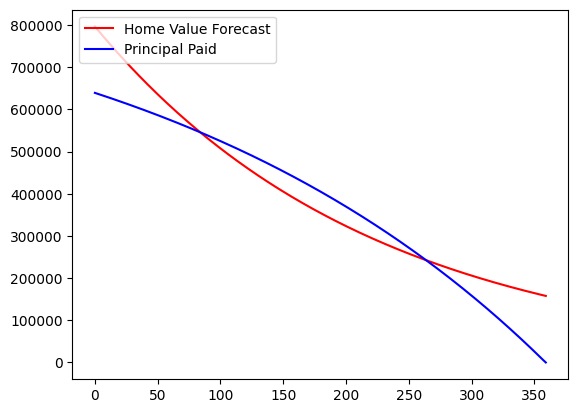

In [32]:
# Forecast the home value over time
home_value_forecast = cumulative_decline_forecast*home_value

# Find all periods where your mortgage is underwater
underwater = principal_remaining > home_value_forecast # when the amount of remaining mortgage to pay is greater than the current house value
pd.value_counts(underwater)

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.legend(handles=[homevalue_plot, principal_plot], loc=2)
plt.show()

# When the blue line is above the red line, you are 'underwater'. 
# Putting more money down and taking a smaller mortgage in the first place will help you avoid this situation.